In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'
suffix = '_skimmed_SR'

In [3]:
# Signal
sig_histo = util.load(f'{prefix}/example_signal{suffix}.coffea')[0]

In [4]:
# Background
bkg_histo = util.load(f'{prefix}/example_bkg{suffix}.coffea')[0]

In [5]:
# sig_histo / bkg_histo is a dictionary of variables
print(sig_histo.keys())

dict_keys(['sel_e1_pt', 'sel_e1_eta', 'sel_e1_phi', 'sel_e1_dxy', 'sel_e1_dxySignif', 'sel_e1_miniRelIso', 'sel_e1_miniRelIsoCorr', 'sel_e1_mindRJets', 'sel_e1_isPF', 'sel_e1_passConvVeto', 'sel_e1_IDscore', 'sel_e2_pt', 'sel_e2_eta', 'sel_e2_phi', 'sel_e2_dxy', 'sel_e2_dxySignif', 'sel_e2_miniRelIso', 'sel_e2_miniRelIsoCorr', 'sel_e2_mindRJets', 'sel_e2_isPF', 'sel_e2_passConvVeto', 'sel_e2_IDscore', 'sel_e1e2_type', 'sel_vtx_dR', 'sel_vtx_mindxy', 'sel_vtx_vxy1', 'sel_vtx_vxy10', 'sel_vtx_vxy100', 'sel_vtx_leadpT', 'sel_vtx_METdPhi', 'sel_vtx_mindRj', 'sel_vtx_chi2', 'sel_vtx_mass', 'sel_vtx_mindPhiJ', 'sel_vtx_sign', 'sel_vtx_pt', 'sel_vtx_eta', 'sel_vtx_phi', 'sel_vtx_type', 'sel_vtx_minEleDrJ', 'sel_vtx_minEleDPhiJ', 'sel_vtx_mass_low', 'sel_vtx_mindxy_low', 'sel_vtx_sign_etaProd', 'sel_vtx_CosThetaColl', 'sel_vtx_LxyCosThetaColl', 'sel_vtx_LxyCosThetaCollZoom', 'sel_vtx_LxyCosThetaCollZoomZoom', 'sel_vtx_eleDphi', 'sel_vtx_maxMiniRelIso', 'sel_vtx_maxMiniRelIsoCorr', 'sel_vtx_e1e

## Signal

### Access the cutflow information

See `analysisTools/utils.py` for more information

In [6]:
utils.get_signal_list_of_cuts(sig_histo)

['Preselections',
 'n(good vertex) > 0',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75',
 'BDT']

In [7]:
utils.get_signal_list_of_cuts(sig_histo, get_cut_idx = True)

['all', 'hasVtx', 'cut5', 'cut6', 'cut7', 'cut8', 'cut9', 'cut10']

**Based on the signal file name, i.e. sig_2018_Mchi-55p0_dMchi-10p0_ctau-100, extract the mass point, lifetime, etc and make it into a pandas dataframe**: use `signalPoint` defined in `/python_analysis/analysisTools/plotTools.py`

In [8]:
utils.get_signal_point_dict(sig_histo)

,mchi,dmchi,ctau,m1,m2,delta,name
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,99.0,18.0,100.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-100
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,99.0,18.0,10.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-10
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,94.5,9.0,100.0,90.0,99.0,0.1,sig_2018_Mchi-94p5_dMchi-9p0_ctau-100
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,94.5,9.0,10.0,90.0,99.0,0.1,sig_2018_Mchi-94p5_dMchi-9p0_ctau-10
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,99.0,18.0,1.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-1
...,...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,110.0,20.0,100.0,100.0,120.0,0.2,sig_2018_Mchi-110p0_dMchi-20p0_ctau-100
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,110.0,20.0,10.0,100.0,120.0,0.2,sig_2018_Mchi-110p0_dMchi-20p0_ctau-10
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,105.0,10.0,10.0,100.0,110.0,0.1,sig_2018_Mchi-105p0_dMchi-10p0_ctau-10
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.5,1.0,1.0,10.0,11.0,0.1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1


**There are four cutflow-related variables in the coffea output.**

- `cutDesc`: cut names
- `cutflow`: efficiency = selected events / total events `cutflow[cutName] += np.sum(events.genWgt)/sum_wgt`
- `cutflow_cts`: reweighted by xsec `cutflow_counts[cutName] = xsec*lumi*cutflow[cutName]`
- `cutflow_nevts`: raw counts `cutflow_nevts[cutName] += len(events)` -- will not be used.
- `cutflow_vtx_matched`: (for signal MC only) fraction that the selected vertex (lowest chi2) passes the truth-matching (gen-matching)

In [9]:
# cutDesc
print(sig_histo['cutDesc'])

print(f"\nex) cut8 corresponds to {sig_histo['cutDesc']['cut8']}")

defaultdict(<class 'str'>, {'all': 'No cuts', 'hasVtx': 'Baseline Selection', 'cut5': 'No b-tagged jets', 'cut6': 'Leading jet |eta| < 2.4', 'cut7': 'Leading jet pT > 80 GeV', 'cut8': 'dPhi(MET,leading jet) > 1.5', 'cut9': 'dPhi(MET,all jets) > 0.75', 'cut10': 'BDT'})

ex) cut8 corresponds to dPhi(MET,leading jet) > 1.5


**Access the cut names stored in cutDesc via getCut defined in `/python_analysis/analysisTools/plotTools.py`.** 
The function removes the redundant junk in `all` and `hasVtx` steps.

In [10]:
sig_histo['cutDesc'].keys()

dict_keys(['all', 'hasVtx', 'cut5', 'cut6', 'cut7', 'cut8', 'cut9', 'cut10'])

In [11]:
# cutflow
cutNames = {cname:ptools.getCut(sig_histo['cutDesc'][cname]) for cname in sig_histo['cutDesc'].keys()}
print(cutNames)

{'all': 'No cuts', 'hasVtx': 'Baseline Selection', 'cut5': 'No b-tagged jets', 'cut6': 'Leading jet |eta| < 2.4', 'cut7': 'Leading jet pT > 80 GeV', 'cut8': 'dPhi(MET,leading jet) > 1.5', 'cut9': 'dPhi(MET,all jets) > 0.75', 'cut10': 'BDT'}


In [12]:
# signal efficiencies by delta/ctau
cf_s = sig_histo['cutflow']              # efficiency
ct_s = sig_histo['cutflow_cts']          # xsec-weighted event count
fr_s = sig_histo['cutflow_vtx_matched'] # fraction that selected vtx is truth-matched, for signal
desc = sig_histo['cutDesc']

In [13]:
# signal efficiencies by delta/ctau
raw_s = sig_histo['cutflow_nevts']

In [14]:
for process in raw_s.keys():
    print(f'{process} after preselections (raw count) = {raw_s[process]["all"]}')

sig_2018_Mchi-99p0_dMchi-18p0_ctau-100 after preselections (raw count) = 12239
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10 after preselections (raw count) = 23574
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100 after preselections (raw count) = 13965
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10 after preselections (raw count) = 32038
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1 after preselections (raw count) = 28918
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1 after preselections (raw count) = 37124
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100 after preselections (raw count) = 5445
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100 after preselections (raw count) = 4859
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10 after preselections (raw count) = 5664
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100 after preselections (raw count) = 4472
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10 after preselections (raw count) = 7867
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1 after preselections (raw count) = 12549
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10 after preselections (raw count) = 9

In [15]:
process = 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-100'

print(process)

print(f'\nEfficiency = selected events / total events analyzed from ntuples: {cf_s[process]}')
print(f'\nEvents (xsec weighted): {ct_s[process]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency = selected events / total events analyzed from ntuples: defaultdict(<class 'float'>, {'all': 0.010360865853993246, 'hasVtx': 0.0029228066715560113, 'cut5': 0.0024962925227047933, 'cut6': 0.002419231522729796, 'cut7': 0.002419231522729796, 'cut8': 0.002419231522729796, 'cut9': 0.0024031647302023207, 'cut10': 0.0021880939417647733})

Events (xsec weighted): defaultdict(<class 'float'>, {'all': 0.6035892038340365, 'hasVtx': 0.17027288806807214, 'cut5': 0.14542560800896037, 'cut6': 0.14093629328594076, 'cut7': 0.14093629328594076, 'cut8': 0.14093629328594076, 'cut9': 0.1400002959816143, 'cut10': 0.12747099507275783})


In [16]:
cut = 'all'

print(process)
print(f'\nEfficiency after {cutNames[cut]}: {cf_s[process][cut]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency after No cuts: 0.010360865853993246


**The efficiency after no cuts applied is less than 1.** 

Note that the efficiency at 'No cuts' step is not 1. This is because the efficiency at this step is the efficiency of the preselections (MET trigger, MET cut etc) applied to the ntuples by the skimmer before we ran the coffea analyzer. In other words, this is 'no cut' from the point of coffea analyzer, but some cuts already have been applied by the skimmer.

In [17]:
cut = 'hasVtx'

print(process)
print(f'\nEfficiency after {cutNames[cut]}: {cf_s[process][cut]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency after Baseline Selection: 0.0029228066715560113


**At this step, we required that there is at least one good ee vertex in the event where both e satisfy the `good_vtx` cuts.**

`defineGoodVertices` in `/python_analysis/analysisTools/analysisSubroutines.py` saves `good_vtx` of di-electrons that pass the electron cuts, out of all `vtx` in the event. `vtx` is saved from the ntuplizer in `AODSkimmer/plugins/ElectronSkimmer.cc`, with all possible ee pairs that form a valid vertex in each event. 

1. `AODSkimmer/plugins/ElectronSkimmer.cc` saves `vtx` information to the ntuples, with all possible ee pairs that form a valid vertex in each event.
2. `defineGoodVertices` in `/python_analysis/analysisTools/analysisSubroutines.py` saves `good_vtx` of di-electrons that pass the electron cuts, out of all `vtx` in the event.
3. `hasVtx` step in `/python_analysis/analysisTools/analysisTools.py` requires that there is at least one `good_vtx` in the event.

Later, the analyzer picks the "best" vertex based on their vertex fitting chi2. Select the vertex that has the lowest chi2 in the event and save it as `sel_vtx`.
For signal, this `sel_vtx` based on chi2 selection may or may not match the "true" vertex that is formed by two gen-matched ee - where the two gen-matched ee refers to: reco electron that is closest to gen electron with dR(gen, reco) < 0.1 and reco positron that is closest to gen positron with dR(gen, reco) < 0.1. 

In [18]:
cut = 'hasVtx'

print(process)
print(f'\Fraction that the selected vertex is truth-matched after {cutNames[cut]}: {fr_s[process][cut]}')

print(f'From {ct_s[process][cut]} events after {cutNames[cut]} step, only {ct_s[process][cut] * fr_s[process][cut]} is truth-matched')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100
\Fraction that the selected vertex is truth-matched after Baseline Selection: 1.9233211874961853
From 0.17027288806807214 events after Baseline Selection step, only 0.3274894532774896 is truth-matched


We don't explicitly cut on truth-matching of the selected vertex, so the efficiency of cutflow does not account for this. 
However, we do save the fraction that the selected vertex is truth-matched at each step. Therefore, to check the cutflow for the events having selected vertices that are also truth-matched, calculate `cutflow_vtx_matched * cutflow_cts` for the xsec-weighted number of events after each step or `cutflow * cutflow_vtx_matched` for the efficiency. 

In [19]:
cut = 'cut5'

print(process)
print(f'\nEfficiency after {cutNames[cut]}: {cf_s[process][cut]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency after No b-tagged jets: 0.0024962925227047933


### Access the cutflow of the signal based on mass point, lifetime, etc

In [20]:
sig_samples = list(sig_histo['cutflow'].keys())
sig_samples

['sig_2018_Mchi-99p0_dMchi-18p0_ctau-100',
 'sig_2018_Mchi-99p0_dMchi-18p0_ctau-10',
 'sig_2018_Mchi-94p5_dMchi-9p0_ctau-100',
 'sig_2018_Mchi-94p5_dMchi-9p0_ctau-10',
 'sig_2018_Mchi-99p0_dMchi-18p0_ctau-1',
 'sig_2018_Mchi-94p5_dMchi-9p0_ctau-1',
 'sig_2018_Mchi-88p0_dMchi-16p0_ctau-100',
 'sig_2018_Mchi-84p0_dMchi-8p0_ctau-100',
 'sig_2018_Mchi-88p0_dMchi-16p0_ctau-10',
 'sig_2018_Mchi-77p0_dMchi-14p0_ctau-100',
 'sig_2018_Mchi-77p0_dMchi-14p0_ctau-10',
 'sig_2018_Mchi-84p0_dMchi-8p0_ctau-1',
 'sig_2018_Mchi-84p0_dMchi-8p0_ctau-10',
 'sig_2018_Mchi-73p5_dMchi-7p0_ctau-100',
 'sig_2018_Mchi-77p0_dMchi-14p0_ctau-1',
 'sig_2018_Mchi-73p5_dMchi-7p0_ctau-10',
 'sig_2018_Mchi-63p0_dMchi-6p0_ctau-100',
 'sig_2018_Mchi-63p0_dMchi-6p0_ctau-10',
 'sig_2018_Mchi-73p5_dMchi-7p0_ctau-1',
 'sig_2018_Mchi-5p5_dMchi-1p0_ctau-100',
 'sig_2018_Mchi-63p0_dMchi-6p0_ctau-1',
 'sig_2018_Mchi-5p5_dMchi-1p0_ctau-1',
 'sig_2018_Mchi-5p25_dMchi-0p5_ctau-100',
 'sig_2018_Mchi-5p5_dMchi-1p0_ctau-10',
 'sig_201

In [21]:
cuts = list(sig_histo['cutflow'][sig_samples[0]].keys())
print(cuts)

['all', 'hasVtx', 'cut5', 'cut6', 'cut7', 'cut8', 'cut9', 'cut10']


In [22]:
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')
si

,mchi,dmchi,ctau,m1,m2,delta,name
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,99.0,18.0,100.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-100
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,99.0,18.0,10.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-10
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,94.5,9.0,100.0,90.0,99.0,0.1,sig_2018_Mchi-94p5_dMchi-9p0_ctau-100
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,94.5,9.0,10.0,90.0,99.0,0.1,sig_2018_Mchi-94p5_dMchi-9p0_ctau-10
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,99.0,18.0,1.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-1
...,...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,110.0,20.0,100.0,100.0,120.0,0.2,sig_2018_Mchi-110p0_dMchi-20p0_ctau-100
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,110.0,20.0,10.0,100.0,120.0,0.2,sig_2018_Mchi-110p0_dMchi-20p0_ctau-10
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,105.0,10.0,10.0,100.0,110.0,0.1,sig_2018_Mchi-105p0_dMchi-10p0_ctau-10
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.5,1.0,1.0,10.0,11.0,0.1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1


In [23]:
deltas = sorted(list(set(si.delta)))

print(f'deltas: {deltas}')

deltas: [0.1, 0.2]


In [24]:
delta = deltas[0]

m1s = sorted(list(set(si[si.delta==delta].m1)))
ctaus = sorted(list(set(si[si.delta==delta].ctau)))

print(f'For delta = {delta}: m1 = {m1s}, ctaus = {ctaus}')

For delta = 0.1: m1 = [5.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0], ctaus = [1.0, 10.0, 100.0]


In [25]:
delta = deltas[0]
m1 = m1s[0]
ct = ctaus[0]

pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
print(f'Signal sample with delta = {delta}, m1 = {m1}, ct = {ct}: {pt}\n')

effs = [cf_s[pt][cut] for cut in cuts]
print(f'Efficiency after each cut: {effs}')

Signal sample with delta = 0.1, m1 = 5.0, ct = 1.0: sig_2018_Mchi-5p25_dMchi-0p5_ctau-1

Efficiency after each cut: [0.008097020820926485, 0.0015372421929807211, 0.001358552299877156, 0.0013211861933823483, 0.0013211861933823483, 0.0013211861933823483, 0.0013086687878186383, 0.0006356159311416311]


### Display the cutflow of efficiency and number of events as pandas dataframe

Check `analysisTools/utils.py` to see how the functions are written. 

In [26]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections',
 'n(good vertex) > 0',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75',
 'BDT']

In [27]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [28]:
table = eff_cutflow
table.columns = cutnames

In [29]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,0.058633,0.020926,0.017976,0.017495,0.017479,0.017479,0.017311,0.013124
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,0.049524,0.015969,0.013702,0.013365,0.013358,0.013358,0.013229,0.010254
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,0.042034,0.013053,0.011267,0.011009,0.011003,0.011003,0.010916,0.008440
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,0.042717,0.015509,0.013293,0.012852,0.012845,0.012845,0.012726,0.010229
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,0.036544,0.011414,0.009620,0.009360,0.009357,0.009357,0.009278,0.007467
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,0.030411,0.009342,0.008014,0.007756,0.007756,0.007756,0.007690,0.006225
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,0.008872,0.002387,0.002050,0.001999,0.001999,0.001999,0.001989,0.001519
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,0.008097,0.001537,0.001359,0.001321,0.001321,0.001321,0.001309,0.000636
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,0.029560,0.011204,0.009515,0.009248,0.009248,0.009248,0.009248,0.008448
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,0.024608,0.007620,0.006551,0.006414,0.006403,0.006403,0.006351,0.005155


In [30]:
# save as csv
outdir = './csv/Cutflow/Efficiency/'
outname = f'SR_Signal_ctau-{int(ct)}_samples_Efficiency'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Efficiency.csv


In [31]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Efficiency'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Efficiency.csv


In [32]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [33]:
table = cts_cutflow
table.columns = cutnames

In [34]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.9968,16.0593,13.7954,13.4265,13.4141,13.4141,13.2850,10.0719
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,179.6814",380.3829,326.3925,318.3509,318.1923,318.1923,315.1109,244.2463
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"1,483.7277",460.7397,397.7201,388.6155,388.3787,388.3787,385.3056,297.9098
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,76.1229,27.6380,23.6888,22.9025,22.8899,22.8899,22.6778,18.2293
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"2,004.2560",625.9776,527.5815,513.3420,513.1620,513.1620,508.8368,409.5464
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"2,773.5559",852.0052,730.9149,707.3517,707.3517,707.3517,701.3878,567.7672
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,653.1159",444.6619,381.9460,372.4481,372.4481,372.4481,370.5481,283.1080
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"34,454.4684","6,541.2778","5,780.9160","5,621.9156","5,621.9156","5,621.9156","5,568.6515","2,704.6749"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,171.8722,65.1416,55.3244,53.7708,53.7708,53.7708,53.7708,49.1184
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,"4,261.2529","1,319.4428","1,134.4059","1,110.6132","1,108.7103","1,108.7103","1,099.6790",892.6405


In [35]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_EventCount_Weighted.csv


In [36]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [37]:
table = raw_cutflow
table.columns = cutnames

In [38]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,28918,10321,8866,8629,8621,8621,8538,6473
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,37124,11970,10271,10018,10013,10013,9916,7686
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,12549,3897,3364,3287,3285,3285,3259,2520
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,12202,4430,3797,3671,3669,3669,3635,2922
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,11124,3474,2928,2849,2848,2848,2824,2273
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,9300,2857,2451,2372,2372,2372,2352,1904
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,2610,702,603,588,588,588,585,447
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,1949,370,327,318,318,318,315,153
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,665,252,214,208,208,208,208,190
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,8955,2773,2384,2334,2330,2330,2311,1876


In [39]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Raw'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Raw.csv


In [40]:
purity_df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched')
purity_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,2.0000,1.9281,1.9291,1.9296,1.9296,1.9296,1.9318,1.9731
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,2.0000,1.9467,1.9470,1.9469,1.9471,1.9471,1.9483,1.9746
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,2.0000,1.9195,1.9196,1.9212,1.9212,1.9212,1.9230,1.9732
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,2.0000,1.9515,1.9519,1.9520,1.9519,1.9519,1.9521,1.9821
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,1.0000,0.9723,0.9730,0.9726,0.9726,0.9726,0.9727,0.9872
...,...,...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,1.0000,0.9593,0.9617,0.9620,0.9620,0.9620,0.9636,0.9822
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,1.0000,0.9772,0.9780,0.9777,0.9777,0.9777,0.9778,0.9890
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,2.0000,1.9519,1.9512,1.9514,1.9516,1.9516,1.9513,1.9805
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,2.0000,1.9361,1.9379,1.9364,1.9364,1.9364,1.9359,1.9971


In [41]:
# For a selected signal point
df = eff_cutflow.loc['sig_2018_Mchi-99p0_dMchi-18p0_ctau-100']
df

Preselections                 0.0226
n(good vertex) > 0            0.0076
No b-tagged jets              0.0065
Leading jet |eta| < 2.4       0.0063
Leading jet pT > 80 GeV       0.0063
dPhi(MET,leading jet) > 1.5   0.0063
dPhi(MET,all jets) > 0.75     0.0062
BDT                           0.0051
Name: sig_2018_Mchi-99p0_dMchi-18p0_ctau-100, dtype: float64

### Plot the efficiency

See `analysisTools/plotTools.py` for more information.

Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1.png


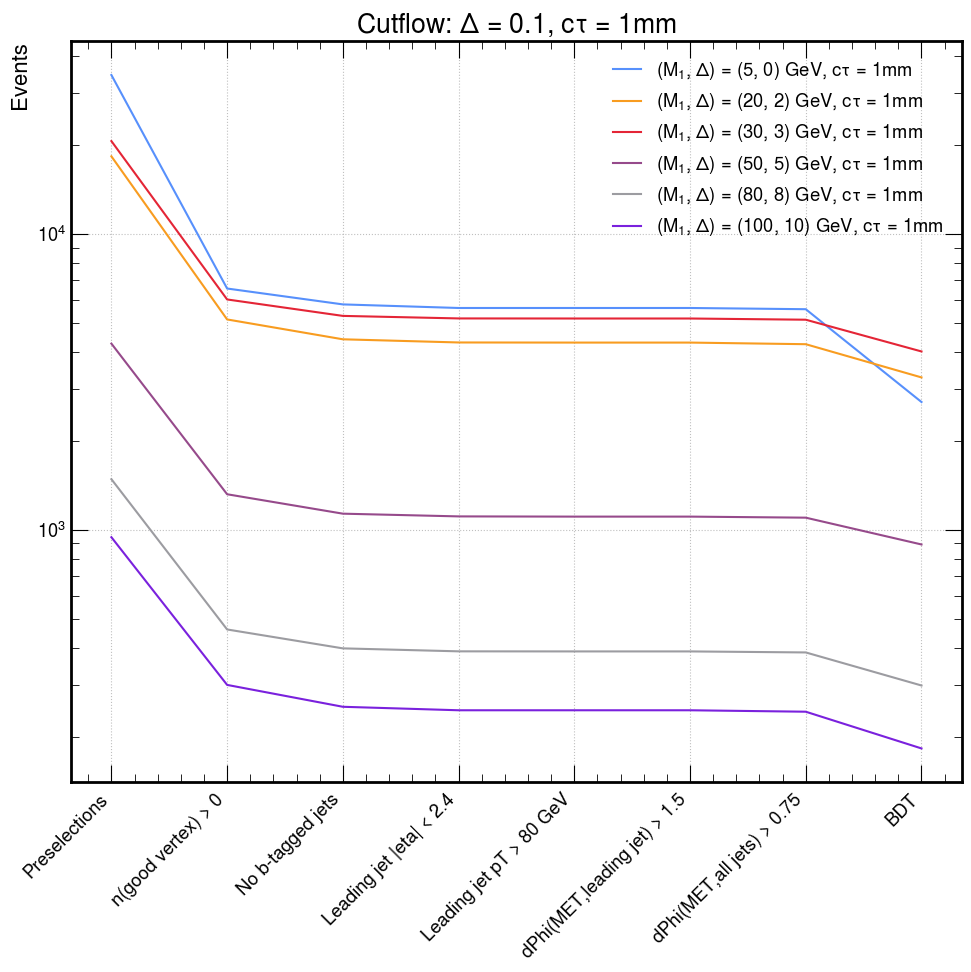

Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10.png


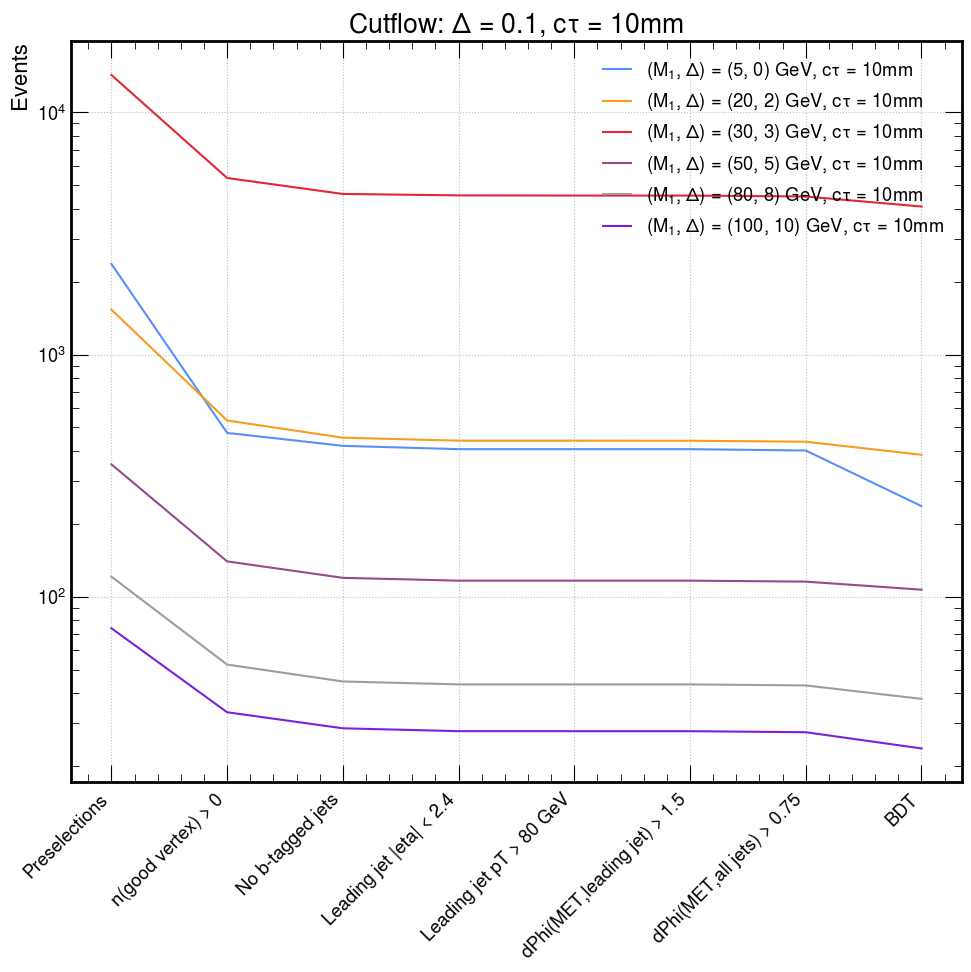

Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100.png


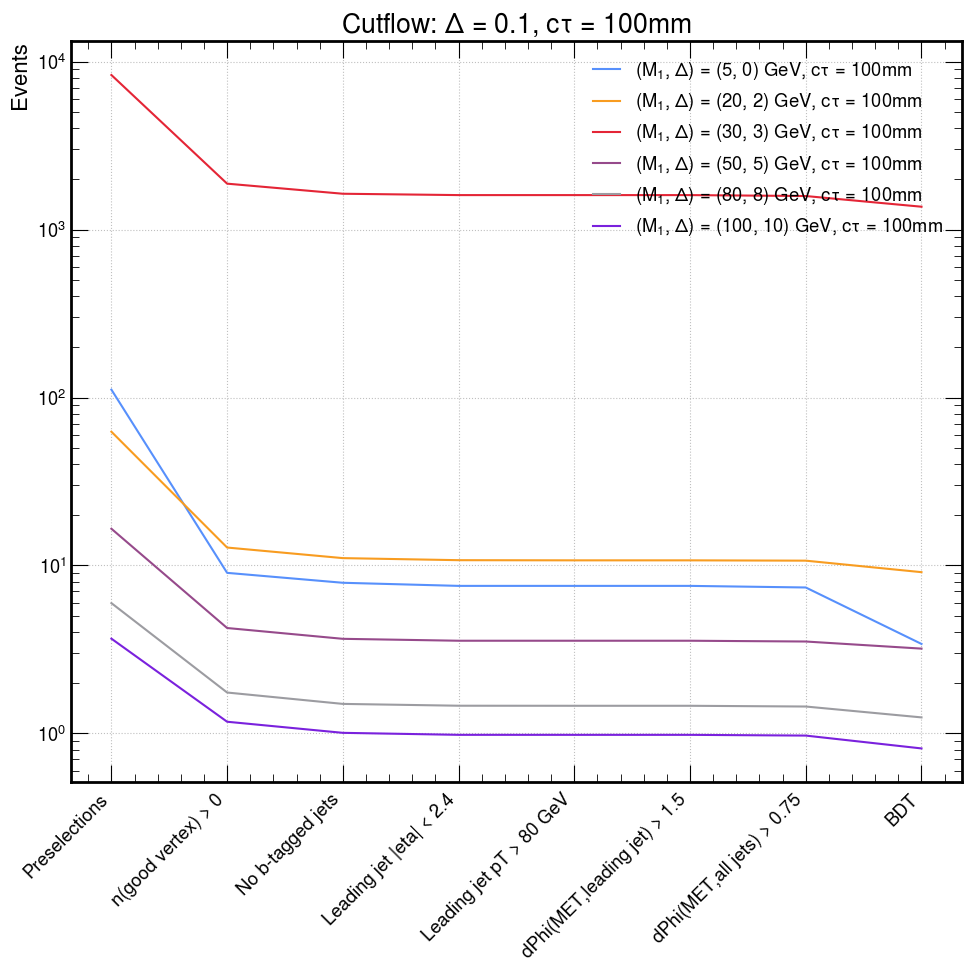

Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1.png


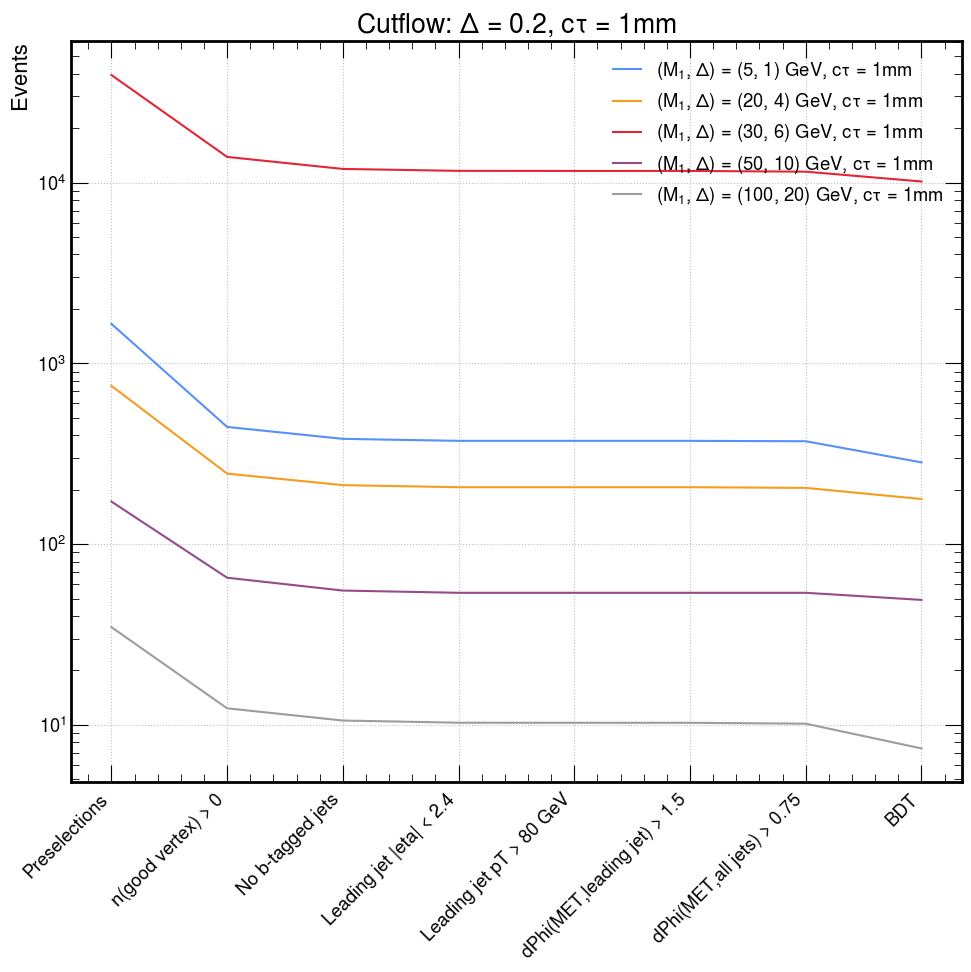

Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10.png


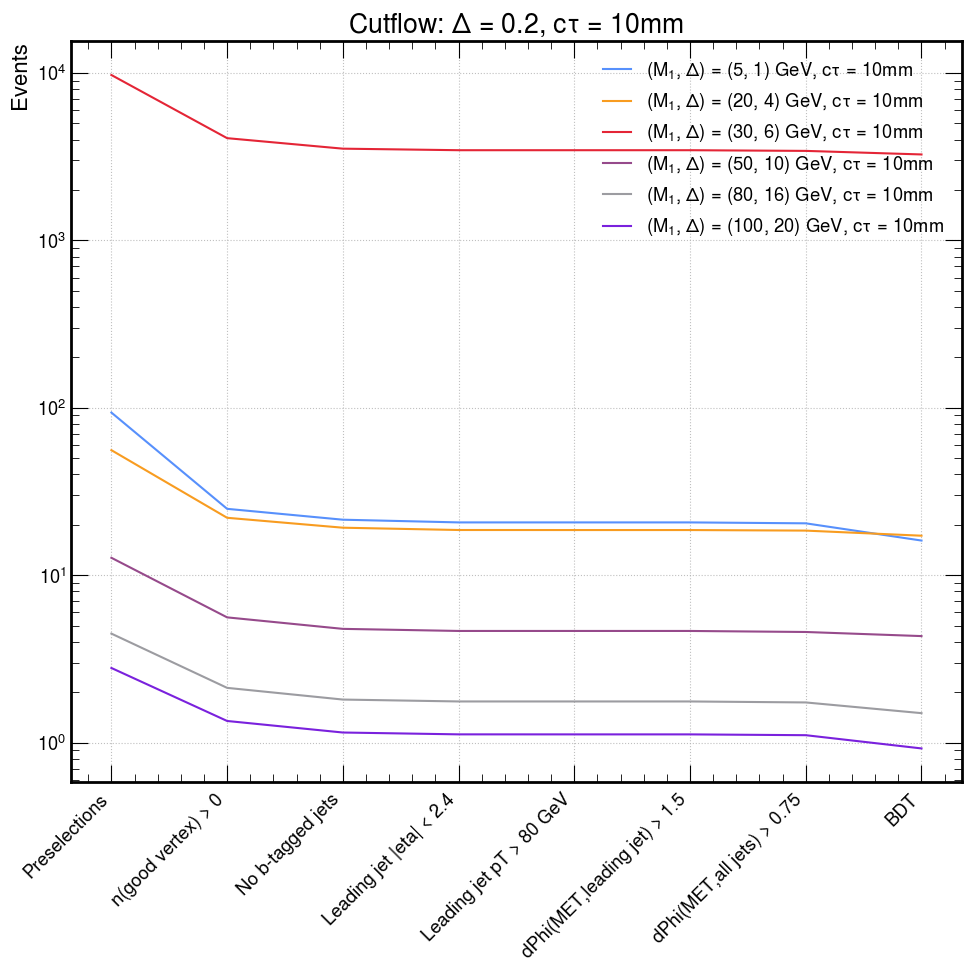

Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100.png


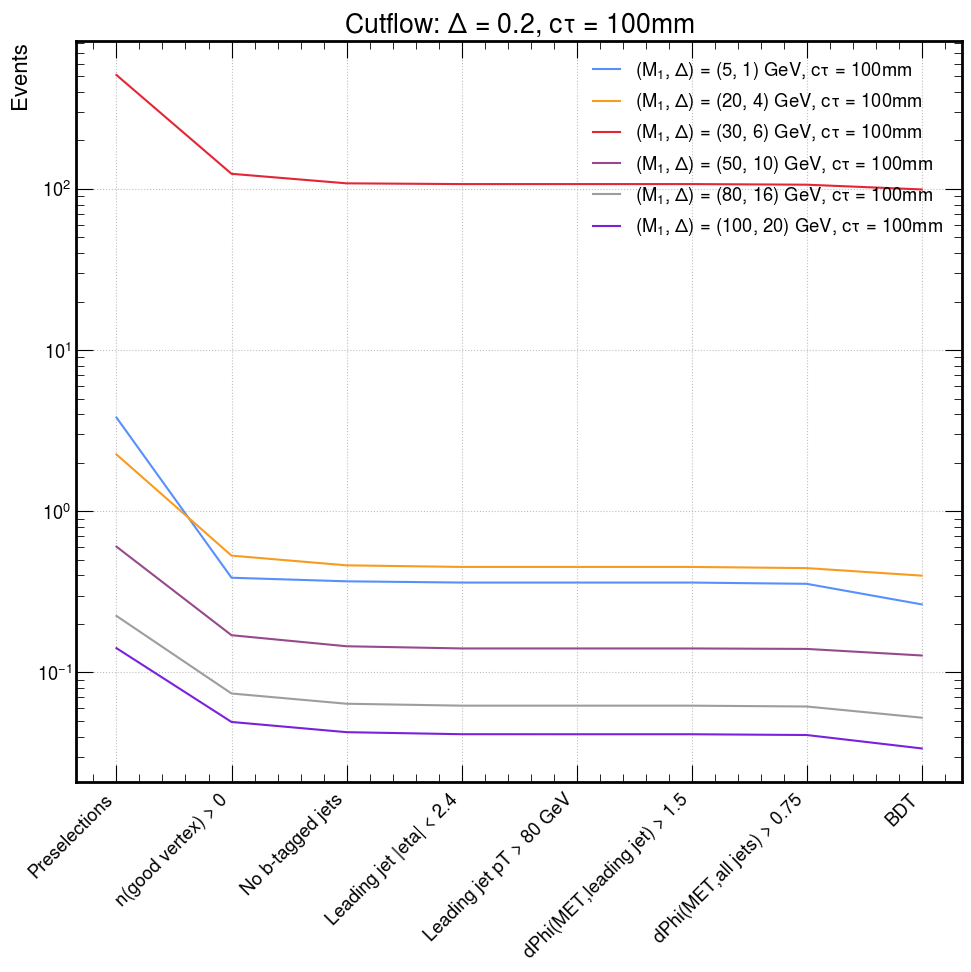

In [42]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 20, 30, 50, 80, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Background

For background processes, each process (i.e. Top) will have several sub-processes. In the coffea output file, we have efficiencies stored for each sub-processes. In order to get the efficiency of the process, not each sub-process, we have to do some math. In other words, we can't just add up efficiencies.

### Get cutflow information

In [43]:
utils.get_bkg_point_dict(bkg_histo)

,Process
bkg_2018_QCD_QCD_HT700to1000,QCD
bkg_2018_QCD_QCD_HT300to500,QCD
bkg_2018_QCD_QCD_HT500to700,QCD
bkg_2018_QCD_QCD_HT1500to2000,QCD
bkg_2018_QCD_QCD_HT1000to1500,QCD
bkg_2018_QCD_QCD_HT2000toInf,QCD
bkg_2018_DY_DYJetsToLL,DY
bkg_2018_ZGamma_ZGToLLG,ZGamma
bkg_2018_ZGamma_ZGToNuNuG,ZGamma
bkg_2018_ZGamma_ZGToJJG,ZGamma


In [44]:
utils.get_bkg_point_dict(bkg_histo, selected_process = 'WJets')

,Process
bkg_2018_WJets_WJetsLNu_HT70to100,WJets
bkg_2018_WJets_WJetsLNu_HT800to1200,WJets
bkg_2018_WJets_WJetsLNu_HT400to600,WJets
bkg_2018_WJets_WJetsLNu_HT600to800,WJets
bkg_2018_WJets_WJetsLNu_HT200to400,WJets
bkg_2018_WJets_WJetsLNu_HT2500toInf,WJets
bkg_2018_WJets_WJetsLNu_HT100to200,WJets
bkg_2018_WJets_WJetsLNu_HT1200to2500,WJets


In [45]:
utils.get_bkg_list_of_cuts(bkg_histo)

['Preselections',
 'n(good vertex) > 0',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75',
 'BDT']

In [46]:
utils.get_bkg_list_of_cuts(bkg_histo, get_cut_idx = True)

['all', 'hasVtx', 'cut5', 'cut6', 'cut7', 'cut8', 'cut9', 'cut10']

### Display the efficiency and event count table in Pandas Dataframe

In [47]:
# efficiency
bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
QCD,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
DY,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
ZGamma,0.0007,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Top,0.0004,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
WJets,0.0010,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Multiboson,0.0006,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
ZJets,0.0023,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Total,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [48]:
# Save as csv
outdir = './csv/Cutflow/Efficiency/'
outname = f'SR_Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/Efficiency//SR_Background_Efficiency.csv


In [49]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
QCD,"46,821.47",295.50,81.29,81.29,81.29,75.17,0.00,0.00
DY,"4,910.17",60.04,42.88,38.60,38.60,38.60,38.60,8.58
ZGamma,"1,441.22",23.36,20.81,18.29,14.16,14.16,13.32,0.00
Top,"16,261.61",168.35,93.21,88.13,84.98,84.92,58.66,4.13
WJets,"205,247.92","1,286.70",908.85,869.22,865.99,862.09,714.74,13.93
Multiboson,"4,362.92",31.03,18.16,16.27,15.57,15.57,13.98,0.21
ZJets,"61,020.03",661.70,499.93,475.59,472.57,471.34,417.92,5.94
Total,"340,065.33","2,526.67","1,665.13","1,587.39","1,573.16","1,561.85","1,257.22",32.78


In [50]:
# Save to csv
outdir = './csv/Cutflow/EventCount_Weighted/'
outname = f'SR_Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/EventCount_Weighted//SR_Background_EventCount_Weighted.csv


In [51]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
QCD,30123,114,31,31,31,27,0,0
DY,1145,14,10,9,9,9,9,2
ZGamma,6172,93,68,61,56,56,44,2
Top,48041,495,283,230,226,224,183,18
WJets,1079551,4609,2627,2544,2537,2492,1717,34
Multiboson,23952,167,99,90,87,87,75,1
ZJets,699914,5865,3954,3817,3804,3767,2802,41
Total,1888898,11357,7072,6782,6750,6662,4830,98


In [52]:
outdir = './csv/Cutflow/EventCount_Raw/'
outname = f'SR_Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/EventCount_Raw//SR_Background_EventCount_Raw.csv


In [53]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 32.78


In [54]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df['BDT']).transpose(), pd.DataFrame(bkg_cts_raw_df['BDT']).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,QCD,DY,ZGamma,Top,WJets,Multiboson,ZJets,Total
Weighted Counts,0.00,8.58,0.00,4.13,13.93,0.21,5.94,32.78
Raw Counts,0.00,2.00,2.00,18.00,34.00,1.00,41.00,98.00


### Plot the efficiency

Saved: ./plots/cutflow//Cutflow_SR_background.png


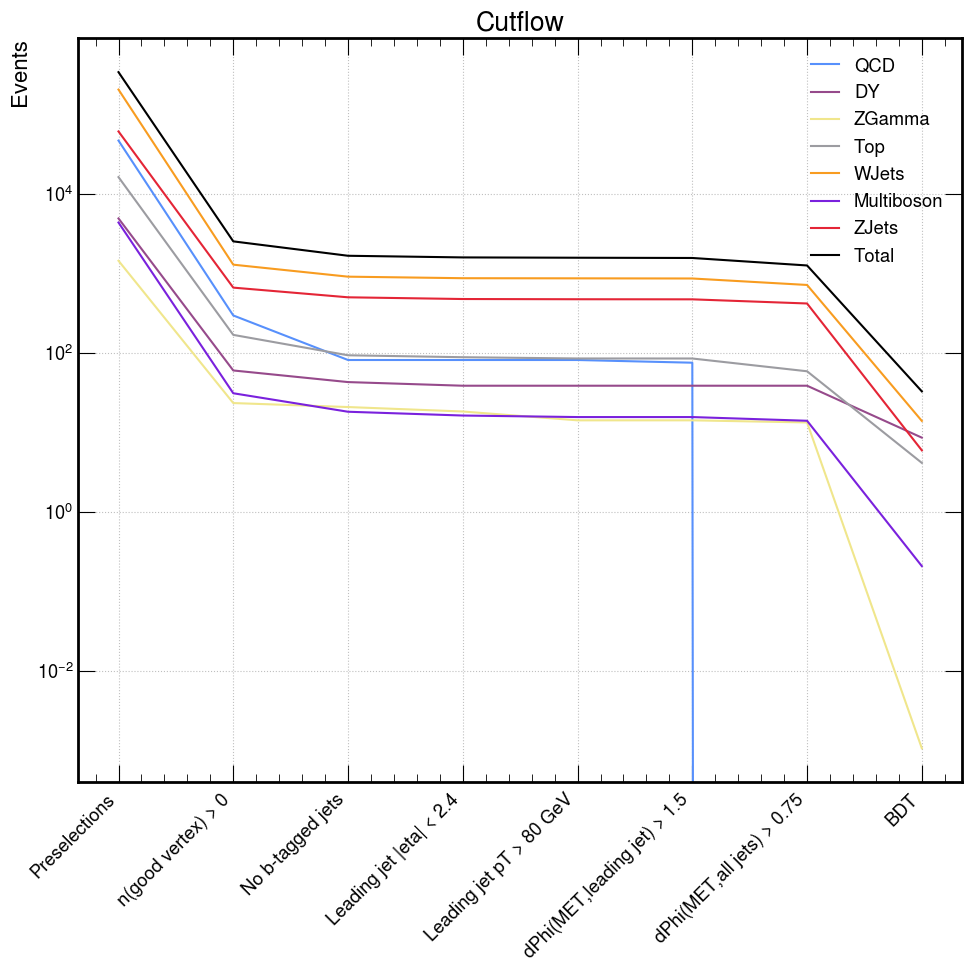

In [55]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': 'Cutflow_SR_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

## S/sqrt(B)

In [56]:
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
nBkg = bkg_cts_df.loc['Total'][-1]

nBkg

32.77935160515051

In [57]:
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table = cts_cutflow

cutnames = utils.get_signal_list_of_cuts(sig_histo)
table.columns = cutnames

In [58]:
pd.options.display.float_format = '{:,.4f}'.format

In [59]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut
df = utils.add_signal_info_to_df(df)
df

,BDT,m1,delta,ctau
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,236.6649,5.0000,0.1000,10.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"2,704.6749",5.0000,0.1000,1.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,16.1098,5.0000,0.2000,10.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,3.4100,5.0000,0.1000,100.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,283.1080,5.0000,0.2000,1.0000
...,...,...,...,...
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,0.8139,100.0000,0.1000,100.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,0.0338,100.0000,0.2000,100.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,0.9236,100.0000,0.2000,10.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,23.6319,100.0000,0.1000,10.0000


In [60]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [61]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]

df

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0000,0.1000,10.0000,236.6649,32.7794,41.3365
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0000,0.1000,1.0000,"2,704.6749",32.7794,472.4054
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0000,0.2000,10.0000,16.1098,32.7794,2.8138
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0000,0.1000,100.0000,3.4100,32.7794,0.5956
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0000,0.2000,1.0000,283.1080,32.7794,49.4484
...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,100.0000,0.2000,100.0000,0.0338,32.7794,0.0059
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,100.0000,0.2000,10.0000,0.9236,32.7794,0.1613
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,100.0000,0.1000,10.0000,23.6319,32.7794,4.1276
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,100.0000,0.2000,1.0000,7.4071,32.7794,1.2937


In [62]:
outdir = './csv/SR_Yields/'
outname = f'SR_S_over_B'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/SR_Yields//SR_S_over_B.csv


### ctau = 1mm

In [63]:
ct = 1.0

In [64]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0,0.1,1.0,"2,704.6749",32.7794,472.4054
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.0,0.1,1.0,"3,393.0692",32.7794,592.6422
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,20.0,0.1,1.0,"3,275.1750",32.7794,572.0504
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1,30.0,0.1,1.0,"4,008.3040",32.7794,700.1006
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1,40.0,0.1,1.0,"2,097.6781",32.7794,366.3858
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,50.0,0.1,1.0,892.6405,32.7794,155.9109
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,60.0,0.1,1.0,567.7672,32.7794,99.1677
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,70.0,0.1,1.0,409.5464,32.7794,71.5324
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,80.0,0.1,1.0,297.9098,32.7794,52.0337
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,90.0,0.1,1.0,244.2463,32.7794,42.6607


In [65]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0,0.2,1.0,283.1080,32.7794,49.4484
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,10.0,0.2,1.0,205.7465,32.7794,35.9362
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,20.0,0.2,1.0,177.5437,32.7794,31.0102
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1,30.0,0.2,1.0,"10,132.4218",32.7794,"1,769.7547"
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1,40.0,0.2,1.0,107.7726,32.7794,18.8238
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,50.0,0.2,1.0,49.1184,32.7794,8.5791
62,60.0,0.2,1.0,0.0000,32.7794,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,70.0,0.2,1.0,18.2293,32.7794,3.1840
65,80.0,0.2,1.0,0.0000,32.7794,0.0000
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,90.0,0.2,1.0,10.0719,32.7794,1.7592


### ctau = 10mm

In [66]:
ct = 10.0

In [67]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0,0.1,10.0,236.6649,32.7794,41.3365
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.0,0.1,10.0,309.5946,32.7794,54.0746
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,20.0,0.1,10.0,385.5793,32.7794,67.3463
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,30.0,0.1,10.0,"4,086.0187",32.7794,713.6745
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,40.0,0.1,10.0,262.7654,32.7794,45.8953
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,50.0,0.1,10.0,106.9215,32.7794,18.6752
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,60.0,0.1,10.0,69.2156,32.7794,12.0894
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,70.0,0.1,10.0,51.8738,32.7794,9.0604
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,80.0,0.1,10.0,37.8602,32.7794,6.6128
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,90.0,0.1,10.0,30.1578,32.7794,5.2674


In [68]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0,0.2,10.0,16.1098,32.7794,2.8138
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,10.0,0.2,10.0,15.0445,32.7794,2.6277
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,20.0,0.2,10.0,17.2201,32.7794,3.0077
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10,30.0,0.2,10.0,"3,259.3567",32.7794,569.2876
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10,40.0,0.2,10.0,10.7125,32.7794,1.8711
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,50.0,0.2,10.0,4.3298,32.7794,0.7563
63,60.0,0.2,10.0,0.0000,32.7794,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,70.0,0.2,10.0,2.0108,32.7794,0.3512
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,80.0,0.2,10.0,1.5005,32.7794,0.2621
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,90.0,0.2,10.0,1.1862,32.7794,0.2072


### ctau = 100mm

In [69]:
ct = 100.0

In [70]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0,0.1,100.0,3.4100,32.7794,0.5956
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,10.0,0.1,100.0,5.5600,32.7794,0.9711
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,20.0,0.1,100.0,9.1209,32.7794,1.5931
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,30.0,0.1,100.0,"1,367.4914",32.7794,238.8496
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,40.0,0.1,100.0,6.9643,32.7794,1.2164
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,50.0,0.1,100.0,3.1981,32.7794,0.5586
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,60.0,0.1,100.0,2.1707,32.7794,0.3791
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,70.0,0.1,100.0,1.5090,32.7794,0.2636
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,80.0,0.1,100.0,1.2456,32.7794,0.2176
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,90.0,0.1,100.0,1.0011,32.7794,0.1749


In [71]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,5.0,0.2,100.0,0.2645,32.7794,0.0462
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,10.0,0.2,100.0,0.2847,32.7794,0.0497
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100,20.0,0.2,100.0,0.3989,32.7794,0.0697
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100,30.0,0.2,100.0,99.2922,32.7794,17.3426
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100,40.0,0.2,100.0,0.2998,32.7794,0.0524
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,50.0,0.2,100.0,0.1275,32.7794,0.0223
64,60.0,0.2,100.0,0.0000,32.7794,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,70.0,0.2,100.0,0.0618,32.7794,0.0108
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,80.0,0.2,100.0,0.0524,32.7794,0.0092
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,90.0,0.2,100.0,0.0393,32.7794,0.0069
